I start by reading in and plotting the slopes of the EU manufacturing production index time series:

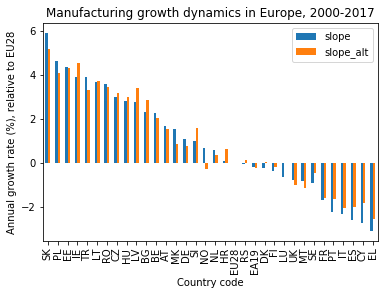

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the dataframe
df = pd.read_pickle('EU_industry_production_slopes.pkl')

# Creating the bar chart
ax = df[['slope','slope_alt']].mul(100).sort_values(by=['slope'], ascending=False).plot(kind='bar')
plt.xlabel('Country code')
plt.ylabel('Annual growth rate (%), relative to EU28')
plt.title('Manufacturing growth dynamics in Europe, 2000-2017')
plt.show()

Let's now color-code the bars by region. First, I remove the alternate slope from the bar chart:

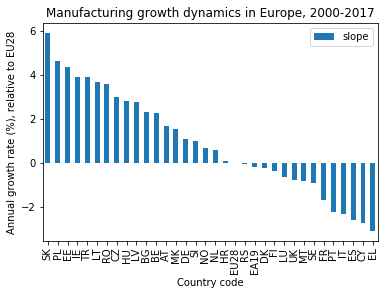

In [8]:
# Store modified slope column from df in new dataframe:
df_sorted_slopes = df[['slope']].mul(100).sort_values(by=['slope'], ascending=False)

# Create plot:
ax = df_sorted_slopes.plot(kind='bar')
plt.xlabel('Country code')
plt.ylabel('Annual growth rate (%), relative to EU28')
plt.title('Manufacturing growth dynamics in Europe, 2000-2017')
plt.show()

Next, I associate each country code with a European region, using the broad geographical categories "West", "East", "North", "South", "Center". Additional labels are "Non-EU" for non-EU countries and "Average" for the "EU28" and "EA19" averages.

I store the country_code/region pairs in a dictionary and turn it into a pandas series:

In [3]:
# Associate country codes with European regions:
region_dict = {'AT': 'Center', 'BE': 'Center', 'BG': 'East', 'CY': 'South', 'CZ': 'East', 'DE': 'Center', 'DK': 'North', 'EA19': 'Average', 'EE': 'East', 'EL': 'South', 'ES': 'South',
       'EU28': 'Average', 'FI': 'North', 'FR': 'West', 'HR': 'South', 'HU': 'East', 'IE': 'West', 'IT': 'South', 'LT': 'East', 'LU': 'Center', 'LV': 'East', 'MK': 'Non-EU',
       'MT': 'South', 'NL': 'Center', 'NO': 'Non-EU', 'PL': 'East', 'PT': 'South', 'RO': 'East', 'RS': 'Non-EU', 'SE': 'North', 'SI': 'South', 'SK': 'East', 'TR': 'Non-EU', 'UK': 'West'}

# Create pandas series from dictionary:
region_series = pd.Series(region_dict)
print(region_series)

AT       Center
BE       Center
BG         East
CY        South
CZ         East
DE       Center
DK        North
EA19    Average
EE         East
EL        South
ES        South
EU28    Average
FI        North
FR         West
HR        South
HU         East
IE         West
IT        South
LT         East
LU       Center
LV         East
MK       Non-EU
MT        South
NL       Center
NO       Non-EU
PL         East
PT        South
RO         East
RS       Non-EU
SE        North
SI        South
SK         East
TR       Non-EU
UK         West
dtype: object


The series can be easily added as a column to the dataframe:

In [47]:
df_sorted_slopes['region'] = region_series
print(df_sorted_slopes.head())

                 slope  region
country_code                  
SK            5.912756    East
PL            4.644023    East
EE            4.363604    East
IE            3.928391    West
TR            3.898301  Non-EU


As the next step, I associate colors with the different regions, again with a dictionary:

In [20]:
# Create color dictionary:
color_dict = {'West':'tab:blue', 'East':'tab:red', 'North':'xkcd:warm purple', 'South':'xkcd:toxic green', 'Center':'xkcd:macaroni and cheese', 'Non-EU':'tab:gray', 'Average':'k'}

# Map colors to countries:
colors = list(df_sorted_slopes['region'].map(color_dict))
print(colors)

['tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:gray', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'tab:red', 'xkcd:macaroni and cheese', 'xkcd:macaroni and cheese', 'tab:gray', 'xkcd:macaroni and cheese', 'xkcd:toxic green', 'tab:gray', 'xkcd:macaroni and cheese', 'xkcd:toxic green', 'k', 'tab:gray', 'k', 'xkcd:warm purple', 'xkcd:warm purple', 'xkcd:macaroni and cheese', 'tab:blue', 'xkcd:toxic green', 'xkcd:warm purple', 'tab:blue', 'xkcd:toxic green', 'xkcd:toxic green', 'xkcd:toxic green', 'xkcd:toxic green', 'xkcd:toxic green']


The "tab" colors are taken from the standard categorical color palette, the "xkcd" colors come from the xkcd color survey (https://xkcd.com/color/rgb/), and "k" stands for black.

Now I can produce the plot, where I pass the "colors" list to the "color" argument of the pandas "plot()" method. I also add a legend that relates the colors to regions. The custom legend is built with the matplotlib "Patch" object and a list comprehension that iterates over the color dictionary:

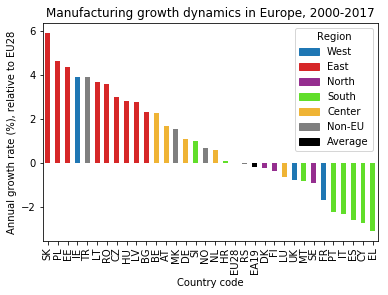

In [46]:
import matplotlib.patches as mpatches

# Define basic plot:
ax = df_sorted_slopes['slope'].plot(kind='bar', color=colors)
plt.xlabel('Country code')
plt.ylabel('Annual growth rate (%), relative to EU28')
plt.title('Manufacturing growth dynamics in Europe, 2000-2017')

# Define custom legend from color_dict:
patch_list = [mpatches.Patch(color=value, label=key) for key,value in color_dict.items()]
plt.legend(handles=patch_list, title='Region')

# Draw plot:
plt.show()

The plot highlights the connection between geographical location and the growth rate of the manufacturing industry.